In [1]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
# print('Using CAMB installed at %s'%(os.path.realpath(os.path.join(os.getcwd(),'..'))))
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower
# print('CAMB version: %s '%camb.__version__)

In [3]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
pars.NonLinearModel.set_params(halofit_version='takahashi')

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.05, ombh2 = 0.02225, omch2 = 0.1198, 
                   tau=0.079, num_massive_neutrinos=0, mnu=0.0, 
                   standard_neutrino_neff=3.046)
pars.InitPower.set_params(As=2.2065e-9, ns=0.9645)
pars.set_for_lmax(4000, max_eta_k=12000, lens_potential_accuracy=4);
pars.set_accuracy(AccuracyBoost=3, lAccuracyBoost=3, lSampleBoost=3, DoLateRadTruncation=False )
pars.AccuratePolarization = True
pars.AccurateReionization = True
pars.YHe = 0.24
# pars.omegan = 0.0006445
pars.omegak = 0.
pars.set_nonlinear_lensing(True)



total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(4042, 4)


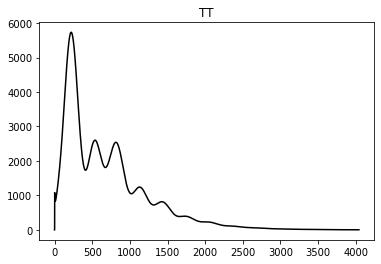

In [4]:
#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots()
ax.plot(ls,totCL[:,0],'k-')
ttCAMB = totCL[:,0]
ax.set_title('TT');



In [ ]:
from classy import Class

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'output': 'tCl lCl mPk',
    'l_max_scalars': 4000,
    'lensing': 'yes',
    'non linear': 'halofit',
    'omega_b' : 0.02225,
    'omega_cdm' : 0.1198,
    'h' : 0.6705,
    'ln10^{10}A_s' : 3.094,
    'n_s' : 0.9645,
    'tau_reio' : 0.079,
    'N_eff': 3.046,
    'YHe' : 0.24,
    'N_ncdm' : 0,
    'halofit_k_per_decade' : 3000.,
    'l_switch_limber' : 40.,
    'accurate_lensing':1,
    'num_mu_minus_lmax' : 1000.,
    'delta_l_max' : 1000.,

    "recfast_Nz0":100000,
    "tol_thermo_integration":1.e-5,
    "recfast_x_He0_trigger_delta" : 0.01,
    "recfast_x_H0_trigger_delta" : 0.01,
    "evolver":0,
    "k_min_tau0":0.002,
    "k_max_tau0_over_l_max":10.,
    "k_step_sub":0.015,
    "k_step_super":0.0001,
    "k_step_super_reduction":0.1,
    "start_small_k_at_tau_c_over_tau_h" : 0.0004,
    "start_large_k_at_tau_h_over_tau_k" : 0.05,
    "tight_coupling_trigger_tau_c_over_tau_h":0.005,
    "tight_coupling_trigger_tau_c_over_tau_k":0.008,
    "start_sources_at_tau_c_over_tau_h" : 0.006,
    "l_max_g":50,
    "l_max_pol_g":25,
    "l_max_ur":50,
    "tol_perturb_integration":1.e-6,
    "perturb_sampling_stepsize":0.01,
    "radiation_streaming_approximation" : 2,
    "radiation_streaming_trigger_tau_over_tau_k" : 240.,
    "radiation_streaming_trigger_tau_c_over_tau" : 100.,
    "ur_fluid_approximation" : 2,
    "ur_fluid_trigger_tau_over_tau_k" : 50.,
    "ncdm_fluid_approximation" : 3,
    "ncdm_fluid_trigger_tau_over_tau_k" : 51.,
    "l_logstep":1.026,
    "l_linstep":25,
    "hyper_sampling_flat" : 12.,
    "hyper_sampling_curved_low_nu" : 10.,
    "hyper_sampling_curved_high_nu" : 10.,
    "hyper_nu_sampling_step" : 10.,
    "hyper_phi_min_abs" : 1.e-10,
    "hyper_x_tol" : 1.e-4,
    "hyper_flat_approximation_nu" : 1.e6,
    "q_linstep":0.20,
    "q_logstep_spline": 20.,
    "q_logstep_trapzd" : 0.5,
    "q_numstep_transition" : 250,
    "transfer_neglect_delta_k_S_t0" : 100.,
    "transfer_neglect_delta_k_S_t1" : 100.,
    "transfer_neglect_delta_k_S_t2" : 100.,
    "transfer_neglect_delta_k_S_e" : 100.,
    "transfer_neglect_delta_k_V_t1" : 100.,
    "transfer_neglect_delta_k_V_t2" : 100.,
    "transfer_neglect_delta_k_V_e" : 100.,
    "transfer_neglect_delta_k_V_b" : 100.,
    "transfer_neglect_delta_k_T_t2" : 100.,
    "transfer_neglect_delta_k_T_e" : 100.,
    "transfer_neglect_delta_k_T_b" : 100.,
    "neglect_CMB_sources_below_visibility" : 1.e-30,
    "transfer_neglect_late_source" : 3000.
#     'm_ncdm' : 0.06
}
cosmo = Class()
cosmo.set(params)

cosmo.compute()
cls = cosmo.lensed_cl(4000)
ttCLASS = cls['ell'] * (cls['ell']+1) * cls['tt'] * (1e6 * 2.7255)**2 / (2*np.pi)

In [ ]:
plt.plot( (ttCLASS[:4001]-ttCAMB[:4001]) / ttCAMB[:4001], '-'  )
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C_{\ell}^{TT} / C_{\ell}^{TT}$')
plt.title('TT Comparison of CAMB and CLASS');